In [1]:
import numpy as np

In [2]:
np.zeros(8)

array([0., 0., 0., 0., 0., 0., 0., 0.])

In [3]:
d = {"1": 1}
b = d["1"]
b += 1
print(b)
print(d)

2
{'1': 1}


In [4]:
min_one = lambda x: x-1
min_three = lambda x: x-3
min_four = lambda x: x-4


change_tree = [{"reverse_op": min_one, "cost": 1},
                {"reverse_op": min_three, "cost": 1},
                {"reverse_op": min_four, "cost": 1},]



In [5]:
min_one = lambda x: x-1
del_two = lambda x: x/2
del_three = lambda x: x/3

calc_tree = [{"reverse_op": min_one, "cost": 1},
              {"reverse_op": del_two, "cost": 1},
              {"reverse_op": del_three, "cost": 1},]


In [6]:
def min_ops_dp(input, operations_tree: list):
    min_ops = np.zeros(input, dtype = np.int32)
    intermediate_values = []
    
    for i in range(input):
        if i < 3:
            min_ops[i] = 1
        else:
            min_cost = i+1
            for operation in operations_tree:
                
                res = operation["reverse_op"](i+1)
                if res % 1 != 0:
                  continue
               
                cost = operation["cost"] + min_ops[int(res) - 1]
                
                if cost < min_cost: 
                    min_cost = cost
                    

            min_ops[i] = min_cost
    
    return min_ops[input - 1]


In [7]:
def min_ops_dp(input, operations_tree: list):
    min_ops = np.zeros(input, dtype = np.int32)
    intermediate_values = []
    
    min_ops[0] = 1
    
    for idx in range(1, input, 1):
        
        min_cost = idx + 1
        for operation in operations_tree:
            
            res = operation["reverse_op"](idx+1) #idx+1 = coin nomination
            if res < 0:
                continue
            
            if res != 0:
                cost = operation["cost"] + min_ops[int(res) - 1]
            else: 
                cost = operation["cost"]
                
            if cost < min_cost: 
                min_cost = cost
                

        min_ops[idx] = min_cost
    
    return min_ops[input - 1]


In [8]:
def min_ops_dp(input, operations_tree: list):
    min_ops = np.zeros(input, dtype = np.int32)
    intermediate_values = []
    
    for i in range(input):
        if i < 3:
            min_ops[i] = 1
        else:
            min_cost = i+1
            for operation in operations_tree:
                
                res = operation["reverse_op"](i+1)
                if res < 1:
                  continue
               
                cost = operation["cost"] + min_ops[int(res) - 1]
                
                if cost < min_cost: 
                    min_cost = cost
                    

            min_ops[i] = min_cost
    
    return min_ops[input - 1]


In [9]:
for i in range(1, 17, 1):
    print("n: ", i, "ops: ", min_ops_dp(i, change_tree))

n:  1 ops:  1
n:  2 ops:  1
n:  3 ops:  1
n:  4 ops:  2
n:  5 ops:  2
n:  6 ops:  2
n:  7 ops:  2
n:  8 ops:  3
n:  9 ops:  3
n:  10 ops:  3
n:  11 ops:  3
n:  12 ops:  4
n:  13 ops:  4
n:  14 ops:  4
n:  15 ops:  4
n:  16 ops:  5


In [10]:
a = [2,3]

b = [4]
b.extend(a)
print(b)

[4, 2, 3]


In [11]:
def min_ops_dp(input, operations_tree: list):
    min_cost_history = np.zeros(input, dtype = np.int32)
    intermediate_values = []
    
    for i in range(input):
        if i < 3:
            min_cost_history[i] = 1
            intermediate_values[i].append([i+1])
        else:
            min_cost = i+1
            min_op = {'number': 0, 'cost': i+1}
            for num, op in enumerate(operations_tree):
                
                res = op["reverse_op"](i+1)
                if res % 1 != 0:
                  continue
               
                cost = op["cost"] + min_cost_history[int(res) - 1]
                
                if cost < min_cost: 
                    min_op['cost'] = cost
                    min_op['num'] = num
                    
            min_cost_history[i] = min_cost
            intermediate_values[i].append()
            #record previous?
    
    return min_cost_history[input - 1]


In [12]:
for i in range(1, 17, 1):
    print("n: ", i, "ops: ", min_ops_dp(i))

TypeError: min_ops_dp() missing 1 required positional argument: 'operations_tree'

In [ ]:
_up = lambda x
_down = lambda x: x-3
min_four = lambda x: x-4


change_tree = [{"reverse_op": min_one, "cost": 1},
                {"reverse_op": min_three, "cost": 1},
                {"reverse_op": min_four, "cost": 1},]

In [1]:
import numpy as np

In [2]:
def edit_distance(first_string, second_string):
    dp_table = np.zeros((len(first_string)+1, len(second_string) + 1))
    op_history_table = np.zeros((len(first_string)+1, len(second_string) + 1))
    
    for i in range(dp_table.shape[0]):
        for j in range(dp_table.shape[1]):
            if i == 0 and j == 0:
                dp_table[i, j] = 0
            elif i == 0:
                dp_table[i, j] = dp_table[i, j-1] + 1
            elif j == 0:
                dp_table[i, j] = dp_table[i-1, j] + 1
            else:
                min_ops_num = max(i,j)
                
                current_ops_num = min_ops_num
                #_up
                current_ops_num = dp_table[i-1, j] + 1
                if(current_ops_num <= min_ops_num): 
                    min_ops_num = current_ops_num
                    op_history_table[i, j] = 1
                #_down
                current_ops_num = dp_table[i, j-1] + 1
                if(current_ops_num <= min_ops_num): 
                    min_ops_num = current_ops_num
                    op_history_table[i, j] = 2
                
                if(first_string[i-1] == second_string[j-1]):
                    current_ops_num = dp_table[i-1, j-1]
                    if(current_ops_num <= min_ops_num): 
                        min_ops_num = current_ops_num
                        op_history_table[i, j] = 3
                else: 
                    current_ops_num = dp_table[i-1, j-1] + 1
                    if(current_ops_num <= min_ops_num): 
                        min_ops_num = current_ops_num
                        op_history_table[i, j] = 3
                
                dp_table[i, j] = min_ops_num
                #if first_string[i] == second_string[j]:
                    
            
    return dp_table[dp_table.shape[0] - 1, dp_table.shape[1] - 1]

In [32]:
edit_distance("suck", "ass")

4.0

In [35]:
edit_distance("editing", "distance")

5.0

In [34]:
edit_distance("ab", "ab")

0.0

In [6]:
def edit_distance(first_string, second_string):
    dp_table = np.zeros((len(first_string)+1, len(second_string) + 1))
    op_history_table = np.zeros((len(first_string)+1, len(second_string) + 1))
    
    common_numbers = 0
    
    for i in range(dp_table.shape[0]):
        for j in range(dp_table.shape[1]):
            if i == 0 and j == 0:
                dp_table[i, j] = 0
            elif i == 0:
                dp_table[i, j] = dp_table[i, j-1] + 1
            elif j == 0:
                dp_table[i, j] = dp_table[i-1, j] + 1
            else:
                min_ops_num = max(i,j)
                
                current_ops_num = min_ops_num
                #_up
                current_ops_num = dp_table[i-1, j] + 1
                if(current_ops_num <= min_ops_num): 
                    min_ops_num = current_ops_num
                    op_history_table[i, j] = 1
                #_down
                current_ops_num = dp_table[i, j-1] + 1
                if(current_ops_num <= min_ops_num): 
                    min_ops_num = current_ops_num
                    op_history_table[i, j] = 2
                
                if(first_string[i-1] == second_string[j-1]):
                    current_ops_num = dp_table[i-1, j-1]
                    if(current_ops_num <= min_ops_num): 
                        min_ops_num = current_ops_num
                        common_numbers += 1
                        op_history_table[i, j] = 3
                
                dp_table[i, j] = min_ops_num
                #if first_string[i] == second_string[j]:
                    
            
    return dp_table

In [4]:
edit_distance([3, 1, 2, 7, 8, 6], [3, 1, 7, 2, 6, 8])

(array([[0., 1., 2., 3., 4., 5., 6.],
        [1., 0., 1., 2., 3., 4., 5.],
        [2., 1., 0., 1., 2., 3., 4.],
        [3., 2., 1., 2., 1., 2., 3.],
        [4., 3., 2., 1., 2., 3., 4.],
        [5., 4., 3., 2., 3., 4., 3.],
        [6., 5., 4., 3., 4., 3., 4.]]),
 array([[0., 0., 0., 0., 0., 0., 0.],
        [0., 3., 2., 2., 2., 2., 2.],
        [0., 1., 3., 2., 2., 2., 2.],
        [0., 1., 1., 2., 3., 2., 2.],
        [0., 1., 1., 3., 2., 2., 2.],
        [0., 1., 1., 1., 2., 2., 3.],
        [0., 1., 1., 1., 2., 3., 2.]]))

In [7]:
edit_distance([2, 7, 8, 3], [5, 2, 8, 7])

(array([[0., 1., 2., 3., 4.],
        [1., 1., 1., 2., 3.],
        [2., 2., 2., 3., 2.],
        [3., 3., 3., 2., 3.],
        [4., 4., 4., 3., 4.]]),
 3)

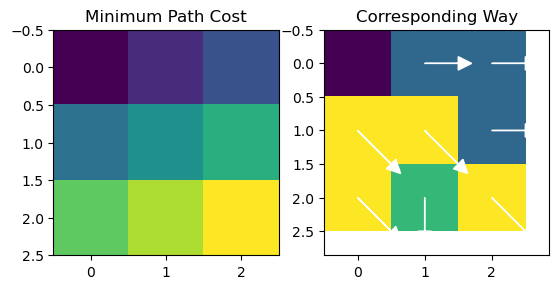

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Example arrays
cost_array = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
way_array = np.array([[0, 1, 1], [3, 3, 1], [3, 2, 3]])

# Create a new figure
fig = plt.figure()

# Plot the minimum path cost array
ax1 = fig.add_subplot(121)
ax1.imshow(cost_array, cmap='viridis', interpolation='nearest')
ax1.set_title('Minimum Path Cost')

# Plot the corresponding way array
ax2 = fig.add_subplot(122)
ax2.imshow(way_array, cmap='viridis', interpolation='nearest')
ax2.set_title('Corresponding Way')

# Add arrows to the corresponding way array
for i in range(way_array.shape[0]):
    for j in range(way_array.shape[1]):
        if way_array[i,j] == 1:
            ax2.arrow(j, i, 0.5, 0, head_width=0.2, head_length=0.2, fc='white', ec='white')
        elif way_array[i,j] == 2:
            ax2.arrow(j, i, 0, 0.5, head_width=0.2, head_length=0.2, fc='white', ec='white')
        elif way_array[i,j] == 3:
            ax2.arrow(j, i, 0.5, 0.5, head_width=0.2, head_length=0.2, fc='white', ec='white')

# Show the figure
plt.show()


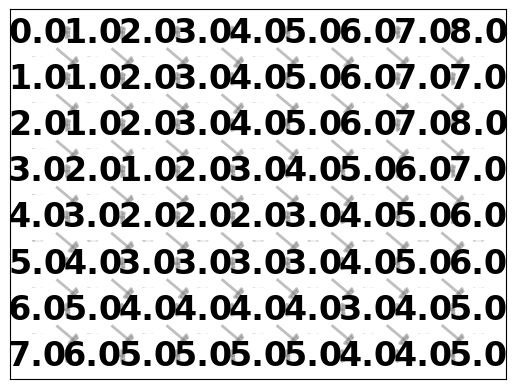

In [25]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Example array
cost_array = dp_table

# Create a new directed graph
G = nx.DiGraph()

# Add nodes to the graph
for i in range(cost_array.shape[0]):
    for j in range(cost_array.shape[1]):
        node_label = cost_array[i, j]
        G.add_node((i, j), label=node_label)

# Add edges to the graph
for i in range(cost_array.shape[0]):
    for j in range(cost_array.shape[1]):
        if i < cost_array.shape[0] - 1:
            G.add_edge((i, j), (i+1, j), direction='down')
        if j < cost_array.shape[1] - 1:
            G.add_edge((i, j), (i, j+1), direction='right')
        if i < cost_array.shape[0] - 1 and j < cost_array.shape[1] - 1:
            G.add_edge((i, j), (i+1, j+1), direction='diagonal')

# Set node positions based on the grid layout
pos = dict()
for i in range(cost_array.shape[0]):
    for j in range(cost_array.shape[1]):
        pos[(i, j)] = (j, cost_array.shape[0]-i-1)

# Create a new figure
fig = plt.figure()

# Draw the nodes and edges of the graph
nx.draw_networkx_nodes(G, pos, node_color='white', node_size=1000, linewidths=2)
nx.draw_networkx_edges(G, pos, width=2, arrows=True, arrowsize=20, edge_color='gray', alpha=0.5)

# Draw the labels of the nodes
node_labels = nx.get_node_attributes(G, 'label')
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=24, font_weight='bold')

# Set axis limits and remove axis ticks
plt.xlim(-0.5, cost_array.shape[1]-0.5)
plt.ylim(-0.5, cost_array.shape[0]-0.5)
plt.xticks([])
plt.yticks([])

# Show the figure
plt.show()
